In [1]:
#import open cv  library
import cv2
#import FER function from fer library
from fer import FER
#matplotlib.pyplot is a collection of command style functions that make matplotlib work like MATLAB
import matplotlib.pyplot as plt 


In [2]:
#Path to input image
imgloc = 'image.jpg'
#Reading the image from location and store in variable 'input_image' by using 'imread' function
input_image = cv2.imread(imgloc)
#To use advanced MTCNN(Multi-Cascade Convolutional Network) just pass `mtcnn=True` in FER
emo_detector = FER(mtcnn=True)


In [3]:
#Capture all the emotions on the image
captured_emotions = emo_detector.detect_emotions(input_image)
#Print input image's emotions information after detection of emotion
print(captured_emotions)

[{'box': [223, 215, 437, 556], 'emotions': {'angry': 0.0, 'disgust': 0.0, 'fear': 0.0, 'happy': 0.12, 'sad': 0.0, 'surprise': 0.0, 'neutral': 0.88}}]


In [4]:
#Making bounding box around face by using  cv2.rectangle function to draw a green rectangle around face
bounding_box = captured_emotions[0]["box"]
emotions = captured_emotions[0]["emotions"]
cv2.rectangle(input_image,(bounding_box[0], bounding_box[1]),(bounding_box[0] + bounding_box[2], bounding_box[1] + bounding_box[3]),(0, 256,0), 2)

array([[[54, 76, 94],
        [52, 74, 92],
        [50, 72, 90],
        ...,
        [28, 48, 65],
        [24, 44, 61],
        [23, 46, 62]],

       [[53, 75, 93],
        [51, 73, 91],
        [53, 75, 93],
        ...,
        [22, 42, 59],
        [24, 44, 61],
        [23, 46, 62]],

       [[54, 76, 94],
        [51, 73, 91],
        [55, 77, 95],
        ...,
        [22, 42, 59],
        [29, 49, 66],
        [28, 51, 67]],

       ...,

       [[91, 61, 44],
        [81, 51, 34],
        [80, 50, 33],
        ...,
        [56, 62, 67],
        [58, 64, 69],
        [54, 61, 64]],

       [[84, 54, 37],
        [80, 50, 33],
        [83, 53, 36],
        ...,
        [53, 59, 64],
        [55, 61, 66],
        [57, 63, 68]],

       [[79, 49, 32],
        [76, 46, 29],
        [79, 49, 32],
        ...,
        [55, 61, 66],
        [52, 58, 63],
        [55, 61, 66]]], dtype=uint8)

In [5]:
import numpy as np
#Add Score to Bounding Box
#Store the top emotion value in 'emotion_name,score' by using 'emo_detector.top_emotion(image)' method
emotion_name, score = emo_detector.top_emotion(input_image )
#select the highest score emotion
if(score==np.max(score)):
        emotion = "{}".format(emotion_name)
        print("detected_emotion:",emotion_name)

#"cv2.putText()" method is used to draw a text string on any image
cv2.putText(input_image,emotion,
               (bounding_box[0], bounding_box[1] + bounding_box[3] + 30 ),
               cv2.FONT_HERSHEY_SIMPLEX,1.5,(0,256,0),4,cv2.LINE_AA,)
#Save the result in new image file 
cv2.imwrite("facial_emotion.jpg", input_image)

detected_emotion: neutral


True

Emotion : neutral


(-0.5, 920.5, 971.5, -0.5)

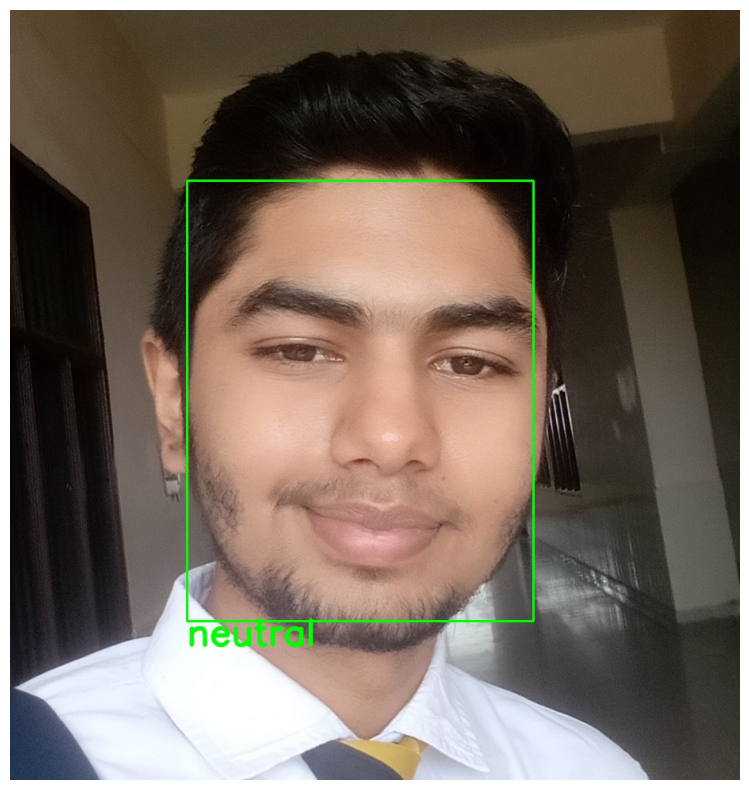

In [6]:
import matplotlib.image as mpimg
#Read image file using matplotlib's image module
result_image =mpimg.imread('facial_emotion.jpg')
#Create a new figure with a size of 20x20 using plt.figure()
plt.figure(figsize=(10,10))
#Display an image stored in the variable img_rgb using plt.imshow()
plt.imshow(result_image)
print("Emotion :", emotion_name)
#Remove the axis labels using plt.axis('off')
plt.axis('off')